<a href="https://colab.research.google.com/github/MiraFinkel/marl_transforms/blob/master/RLTransformsMultiTaxiEnv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.display import HTML, Math
display(HTML("<script src='https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.3/"
             "latest.js?config=default'></script>"))

# Reinforcement Learning Transforms
*Author: Mira Finkelstein*

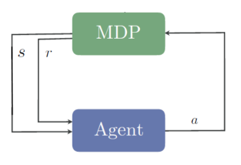

##### **Markov Decision Process (MDP)**
MDPs are a classical formalization of sequential decision-making, where actions influence immediate rewards and subsequent situations or states, and through those future rewards. MDPs are a mathematically idealized form of the reinforcement learning problem for which precise theoretical statements can be made.  An MDP defined as a five tuple $\left<\mathcal{S, A, R, P}, \gamma \right>$. Where:

*   $\mathcal{S}$ is a finite set of states
*   $\mathcal{A}$ is finite set of actions
*   $\mathcal{R:S}\times \mathcal{A} \rightarrow [0,\mathcal{R}_{max}]$ is a reward function
*   $\mathcal{P:S}\times \mathcal{A} \rightarrow \mathbb{P}[\mathcal{S}]$ is a transition function denoting a probability distribution over next states given a previous state and action.
*   $\gamma \in [0, 1]$ is a discount factor, symbolizing how much the agent favors short-term to long-term rewards.

The solution to an MDP is a policy, indicated $\pi:\mathcal{S} \rightarrow \mathbb{P}[\mathcal{A}]$ designating an action selection procedure. The agent's goal is to take action (i.e., calculate policy) that maximizes the long-term expected rewards.



##### **Taxi Environment**

The full description of the Multi-Taxi environment you can find [here](https://colab.research.google.com/drive/1mgWCaW5xvAyeXLgURtqfmIAM19yadk6W?authuser=1#scrollTo=xzNteZIEUGCh).

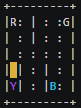

## Single Agent
Let's consider a case where we have a single agent. Its purpose is to take all passengers to their destinations. We will first model the problem as an MDP problem:
*   $s\in\mathcal{S}$ is represented as 
`
[taxi location], [current_fuel], [passengers_start_locations], [destinations], [passengers_status]
`
*   $a\in\mathcal{A}$ is on of 
`
{0: 'south',
 1: 'north',
 2: 'east',
 3: 'west',
 4: 'pickup',
 5: 'dropoff',
 6: 'turn_engine_on',
 7: 'turn_engine_off',
 8: 'standby',
 9: 'refuel'}
 `
*   $\mathcal{R}$ is a reward function
*   $\mathcal{P}$ is a transition function denoting a probability distribution over next states given a previous state and action.
*   $\gamma \in [0, 1]$ is a discount factor, symbolizing how much the agent favors short-term to long-term rewards.





### Initialization

We will use RLlib for the algorithms, so let's install it and clone the project:

In [ ]:
!pip install 'ray[rllib]'
!pip install --upgrade tensorflow

     |████████████████████████████████| 47.5MB 98kB/s 
     |████████████████████████████████| 81kB 12.3MB/s 
     |████████████████████████████████| 71kB 11.2MB/s 
     |████████████████████████████████| 1.3MB 43.9MB/s 
     |████████████████████████████████| 81kB 11.8MB/s 
     |████████████████████████████████| 3.2MB 44.9MB/s 
     |████████████████████████████████| 204kB 51.9MB/s 
     |████████████████████████████████| 133kB 52.2MB/s 
     |████████████████████████████████| 1.8MB 40.8MB/s 
     |████████████████████████████████| 36.4MB 121kB/s 
     |████████████████████████████████| 317kB 48.5MB/s 
     |████████████████████████████████| 61kB 8.8MB/s 
     |████████████████████████████████| 143kB 62.8MB/s 
     |████████████████████████████████| 296kB 49.5MB/s 
     |████████████████████████████████| 102kB 13.6MB/s 
  Created wheel for gpustat: filename=gpustat-0.6.0-cp36-none-any.whl size=12622 sha256=8d9365158cdd6ddf1270f8b88c8009b01db1851bd95c827293344ce59759df85
  Stored in d

In [ ]:
!git clone https://github.com/MiraFinkel/marl_transforms.git
%cd marl_transforms
%matplotlib inline

Cloning into 'marl_transforms'...
remote: Enumerating objects: 219, done.
remote: Counting objects: 100% (219/219), done.
remote: Compressing objects: 100% (146/146), done.
remote: Total 219 (delta 104), reused 159 (delta 60), pack-reused 0
Receiving objects: 100% (219/219), 220.99 KiB | 1.26 MiB/s, done.
Resolving deltas: 100% (104/104), done.
/content/marl_transforms


Import the relevant files:

In [ ]:
from utils import *
from visualize import *
from Agents.rl_agent import *
import Agents.rl_agent as rl_agent
from Transforms.taxi_transforms import taxi_move_through_walls_transform, taxi_infinite_fuel_transform, taxi_reward_transform
import ray

Instructions for updating:
non-resource variables are not supported in the long term


### Training
#### Hyper-Parameters of the Class
You can choose an RL agent (from RLlib) from this list:

1. A2C
2. A3C
3. BC
4. DQN
5. APEX_DQN
6. IMPALA
7. MARWIL
8. PG
9. PPO
10. APPO
11. SAC
12. LIN_UCB
13. LIN_TS

You can read the agent's description [here](https://docs.ray.io/en/master/rllib-algorithms.html)

You need to choose the number of training epochs: iteration_num


In [ ]:
env_name = TAXI # in the future there will be more environments
number_of_agents = 1
agent_name = A3C
iteration_num = 30

#### Create the environment:

In [ ]:
# get the environment
env, env_to_agent = get_env(env_name, number_of_agents)

#### Create and train the agent

In [ ]:
ray.shutdown() # for the case that ray did not close automatically.

# define the agents that are operating in the environment
ray.init(num_gpus=NUM_GPUS, local_mode=True)

# create agent and train it in env
agent, episode_reward_mean = rl_agent.create_agent_and_train(env, env_to_agent, env_name, number_of_agents,
                                                              agent_name, iteration_num, display=False)

2021-02-13 13:02:59,417	INFO services.py:1174 -- View the Ray dashboard at http://127.0.0.1:8265
2021-02-13 13:03:02,992	INFO trainer.py:616 -- Tip: set framework=tfe or the --eager flag to enable TensorFlow eager execution
2021-02-13 13:03:02,994	INFO trainer.py:643 -- Current log_level is WARN. For more information, set 'log_level': 'INFO' / 'DEBUG' or use the -v and -vv flags.
2021-02-13 13:03:03,115	WARNING deprecation.py:34 -- DeprecationWarning: `framestack` has been deprecated. Use `num_framestacks (int)` instead. This will raise an error in the future!
2021-02-13 13:03:04,030	WARNING deprecation.py:34 -- DeprecationWarning: `env_index` has been deprecated. Use `episode.env_id` instead. This will raise an error in the future!
2021-02-13 13:03:04,039	WARNING deprecation.py:34 -- DeprecationWarning: `framestack` has been deprecated. Use `num_framestacks (int)` instead. This will raise an error in the future!
2021-02-13 13:03:04,793	WARNING util.py:47 -- Install gputil for GPU syst

Instructions for updating:
Prefer Variable.assign which has equivalent behavior in 2.X.
  1 mean reward:    nan, variance:    nan, running time:    nan
  2 mean reward: -725.92, variance: 2096.00, running time: 220.08
  3 mean reward: -285.61, variance: 2202.00, running time: 172.84
  4 mean reward: -164.60, variance: 2216.00, running time: 158.00
  5 mean reward: -102.89, variance: 2234.00, running time: 148.37
  6 mean reward: -68.96, variance: 2234.00, running time: 143.40
  7 mean reward:  33.62, variance: 176.00, running time: 131.15
  8 mean reward:  42.79, variance:  85.00, running time: 128.32
  9 mean reward:  44.84, variance:  85.00, running time: 127.45
 10 mean reward:  47.09, variance:  97.00, running time: 126.56
 11 mean reward:  45.95, variance: 106.00, running time: 127.13
 12 mean reward:  46.34, variance: 106.00, running time: 126.66
 13 mean reward:  46.16, variance: 106.00, running time: 126.75
 14 mean reward:  46.13, variance: 106.00, running time: 126.70
 15 mea

#### Visualize
If you want to see the agent act in an environment according to the policy he learned during training:

In [ ]:
# evaluate the performance of the agent
rl_agent.run_episode(env, agent, number_of_agents, display=True)


 ================ STARTING EVALUATION ================ 

+---------+
|X: |F: :X|
| : | : : |
| : : :_: |
| | : | : |
|X| :G|X: |
+---------+
  (north)
Taxi1-YELLOW: Fuel: 99, Location: (2,3), Collided: False
Passenger1: Location: (0, 4), Destination: (0, 0)
Done: False, {'taxi_1': False, '__all__': False}
Passengers Status's: [2]
+---------+
|X: |F: :X|
| : | : : |
| : : : : |
| | : |_: |
|X| :G|X: |
+---------+
  (south)
Taxi1-YELLOW: Fuel: 98, Location: (3,3), Collided: False
Passenger1: Location: (0, 4), Destination: (0, 0)
Done: False, {'taxi_1': False, '__all__': False}
Passengers Status's: [2]
+---------+
|X: |F: :X|
| : | : : |
| : : : : |
| | : | : |
|X| :G|X: |
+---------+
  (south)
Taxi1-YELLOW: Fuel: 97, Location: (4,3), Collided: False
Passenger1: Location: (0, 4), Destination: (0, 0)
Done: False, {'taxi_1': False, '__all__': False}
Passengers Status's: [2]
+---------+
|X: |F: :X|
| : | : : |
| : : : : |
| | : | : |
|X| :G|X: |
+---------+
  (south)
Taxi1-YELLOW: Fuel: 97,

#### Target Policy
The target policy is a dictionary, with 8-tuple keys and actions as its values in range 0-5:

`
0='south',
 1='north',
 2='east',
 3='west',
 4='pickup',
 5='dropoff'
`

The 8-tuple is a partial observation:

`
(taxi_location_x, taxi_location_y, fuel_level, passanger_start_x, passanger_start_y, passanger_destination_x, passanger_destination_y, passanger status)
`

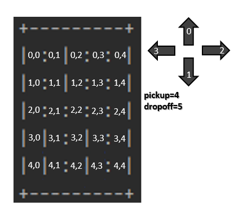

Passenger available location - for start\destination positions:

`
(0,0),(0,4),(4,0),(4,3)
`

Passenger status: (where is the passenger)

`
1=delivered, in_taxi=3, waiting=2
`

In [ ]:
# the target policy (which is part of our input and defined by the user)
target_policy = {
    (0, 0, None, 0, 0, None, None, 2): 4,  # pickup
    (4, 0, None, 4, 0, None, None, 2): 4,  # pickup
    (0, 4, None, 0, 4, None, None, 2): 4,  # pickup
    (4, 3, None, 4, 3, None, None, 2): 4,  # pickup
    (0, 0, None, None, None, 0, 0, 3): 5,  # dropoff
    (4, 0, None, None, None, 4, 0, 3): 5,  # dropoff
    (0, 4, None, None, None, 0, 4, 3): 5,  # dropoff
    (4, 3, None, None, None, 4, 3, 3): 5}  # dropoff

#### Transformed environment
Decide which transforms you want to activate:


1. taxi_move_through_walls_transform(env)
2. taxi_infinite_fuel_transform(env)
3. taxi_reward_transform(env, new_rewards)



In [ ]:
# create a transformed environment
from Environments.MultiTaxiEnv.multitaxienv.config import NEW_TAXI_ENVIRONMENT_REWARDS
transforms = [taxi_infinite_fuel_transform, taxi_reward_transform]
with_reward_transform = False
explanation = None

transform_rewards = []
transformed_env = env

Iterate through the transforms and find an explanation:

In [ ]:
for transform in transforms:
    # create transformed environment
    transformed_env = transform(transformed_env)
    if with_reward_transform:
      transformed_env.set_reward_dict(NEW_TAXI_ENVIRONMENT_REWARDS)

    # create and train agents in env
    agent, transform_episode_reward_mean = rl_agent.create_agent_and_train(transformed_env, env_to_agent,
                                                                            env_name, number_of_agents, agent_name,
                                                                            iteration_num, display=False)
    transform_rewards.append(transform_episode_reward_mean)
    with_reward_transform = True
    # check if the target policy is achieved in trans_env
    if target_policy_achieved(transformed_env, agent, target_policy):
        explanation = transform
        break

if explanation is None:
    print()
    print(" ========== no explanation found ========== ")
else:
    print(" ========== explanation found %s ========== " % explanation)

2021-02-13 13:36:33,398	WARNING deprecation.py:34 -- DeprecationWarning: `framestack` has been deprecated. Use `num_framestacks (int)` instead. This will raise an error in the future!
2021-02-13 13:36:34,039	WARNING deprecation.py:34 -- DeprecationWarning: `framestack` has been deprecated. Use `num_framestacks (int)` instead. This will raise an error in the future!
2021-02-13 13:36:34,791	WARNING util.py:47 -- Install gputil for GPU system monitoring.


  1 mean reward:    nan, variance:    nan, running time:    nan
  2 mean reward: -868.67, variance: 3179.00, running time: 281.44
  3 mean reward: -324.27, variance: 3286.00, running time: 195.00
  4 mean reward: -175.00, variance: 3308.00, running time: 167.87
  5 mean reward: -110.00, variance: 3318.00, running time: 155.66
  6 mean reward: -74.08, variance: 3318.00, running time: 149.04
  7 mean reward:  15.19, variance: 690.00, running time: 134.41
  8 mean reward:  40.50, variance: 101.00, running time: 127.34
  9 mean reward:  44.30, variance:  97.00, running time: 126.49
 10 mean reward:  46.77, variance:  97.00, running time: 125.86
 11 mean reward:  48.28, variance:  84.00, running time: 125.30
 12 mean reward:  47.34, variance:  84.00, running time: 125.90
 13 mean reward:  45.61, variance:  90.00, running time: 126.96
 14 mean reward:  46.60, variance:  90.00, running time: 126.49
 15 mean reward:  45.06, variance:  90.00, running time: 127.39
 16 mean reward:  45.72, varian

In [ ]:
# evaluate the performance of the agent
rl_agent.run_episode(transformed_env, agent, number_of_agents, display=True)

Streaming output truncated to the last 5000 lines.
| | : | : |
|X| :G|X: |
+---------+
  (south)
Taxi1-YELLOW: Fuel: 100, Location: (4,0), Collided: False
Passenger1: Location: (0, 4), Destination: (0, 0)
Done: False, {'taxi_1': False, '__all__': False}
Passengers Status's: [2]
+---------+
|X: |F: :X|
| : | : : |
| : : : : |
|_| : | : |
|X| :G|X: |
+---------+
  (north)
Taxi1-YELLOW: Fuel: 100, Location: (3,0), Collided: False
Passenger1: Location: (0, 4), Destination: (0, 0)
Done: False, {'taxi_1': False, '__all__': False}
Passengers Status's: [2]
+---------+
|X: |F: :X|
| : | : : |
|_: : : : |
| | : | : |
|X| :G|X: |
+---------+
  (north)
Taxi1-YELLOW: Fuel: 100, Location: (2,0), Collided: False
Passenger1: Location: (0, 4), Destination: (0, 0)
Done: False, {'taxi_1': False, '__all__': False}
Passengers Status's: [2]
+---------+
|X: |F: :X|
|_: | : : |
| : : : : |
| | : | : |
|X| :G|X: |
+---------+
  (north)
Taxi1-YELLOW: Fuel: 100, Location: (1,0), Collided: False
Passenger1: Locat

KeyboardInterrupt: ignored

### Visualize
Visualize the mean episode reward:

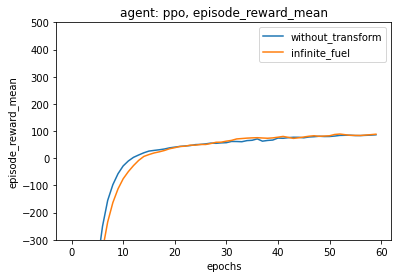

In [ ]:
# visualize rewards
results = [episode_reward_mean] + transform_rewards
names = ["without_transform", "infinite_fuel"]
plot_result_graph(agent_name, results, names, "episode_reward_mean")

In [ ]:
# shut_down
ray.shutdown()

#### Example

In [ ]:
# (taxi_location_x, taxi_location_y, fuel_level, passanger_start_x, passanger_start_y, passanger_destination_x, passanger_destination_y, passanger status) : action
# the target policy (which is part of our input and defined by the user)
target_policy = {(0, 1, None, 0, 0, None, None, 2): 3,  # left
                 (1, 0, None, 0, 0, None, None, 2): 0,  # up
                 (0, 0, None, 0, 0, None, None, 2): 4,  # pickup
                 (4, 1, None, 4, 0, None, None, 2): 3,  # left
                 (3, 0, None, 4, 0, None, None, 2): 1,  # down
                 (4, 0, None, 4, 0, None, None, 2): 4,  # pickup
                 (0, 3, None, 0, 4, None, None, 2): 2,  # right
                 (1, 4, None, 0, 4, None, None, 2): 0,  # up
                 (0, 4, None, 0, 4, None, None, 2): 4,  # pickup
                 (4, 2, None, 4, 3, None, None, 2): 2,  # right
                 (3, 3, None, 4, 3, None, None, 2): 1,  # down
                 (4, 4, None, 4, 3, None, None, 2): 3,  # left
                 (4, 3, None, 4, 3, None, None, 2): 4,  # pickup <==
                 (0, 1, None, 0, 0, None, None, 3): 3,  # left
                 (1, 0, None, 0, 0, None, None, 3): 0,  # up
                 (0, 0, None, 0, 0, None, None, 3): 5,  # dropoff
                 (4, 1, None, 4, 0, None, None, 3): 3,  # left
                 (3, 0, None, 4, 0, None, None, 3): 1,  # down
                 (4, 0, None, 4, 0, None, None, 3): 5,  # dropoff
                 (0, 3, None, 0, 4, None, None, 3): 2,  # right
                 (1, 4, None, 0, 4, None, None, 3): 0,  # up
                 (0, 4, None, 0, 4, None, None, 3): 5,  # dropoff
                 (4, 2, None, 4, 3, None, None, 3): 2,  # right
                 (3, 3, None, 4, 3, None, None, 3): 1,  # down
                 (4, 4, None, 4, 3, None, None, 3): 3,  # left
                 (4, 3, None, 4, 3, None, None, 3): 5}  # dropoff

If you want to render while training, set the display to True: 

```
taxi_env.set_display(True)
```

Every epoch, there will be a print:


`
[epoch] mean reward: [reward], variance: [max reward - min reward], running time: [epoch length]
`

for example:

`9 mean reward: -1166.86, variance: 1095.00, running time: 273.93`


NUM_GPUS = default 0

local_mode = True if you want to debug


In [ ]:
    ray.shutdown()
    # get the environment
    env, env_to_agent = get_env(env_name, number_of_agents)

    ray.init(num_gpus=NUM_GPUS, local_mode=True)

    # create agent and train it in env
    agent, episode_reward_mean = rl_agent.create_agent_and_train(env, env_to_agent, env_name, number_of_agents,
                                                                 agent_name, iteration_num, display=False)

2021-02-12 09:31:26,368	INFO services.py:1173 -- View the Ray dashboard at http://127.0.0.1:8265
2021-02-12 09:31:30,114	INFO trainer.py:591 -- Tip: set framework=tfe or the --eager flag to enable TensorFlow eager execution
2021-02-12 09:31:30,116	INFO trainer.py:618 -- Current log_level is WARN. For more information, set 'log_level': 'INFO' / 'DEBUG' or use the -v and -vv flags.
2021-02-12 09:31:31,649	WARNING dynamic_tf_policy.py:601 -- SampleBatch key 'new_obs' was deleted manually in postprocessing function! RLlib will automatically remove non-used items from the data stream. Remove the `del` from your postprocessing function.
2021-02-12 09:31:32,713	WARNING dynamic_tf_policy.py:601 -- SampleBatch key 'new_obs' was deleted manually in postprocessing function! RLlib will automatically remove non-used items from the data stream. Remove the `del` from your postprocessing function.
2021-02-12 09:31:32,800	WARNING util.py:43 -- Install gputil for GPU system monitoring.
2021-02-12 09:31:

Instructions for updating:
Prefer Variable.assign which has equivalent behavior in 2.X.
  1 mean reward: -1158.00, variance: 282.00, running time: 266.00
  2 mean reward: -688.35, variance: 1797.00, running time: 227.92
  3 mean reward: -334.97, variance: 1963.00, running time: 187.90
  4 mean reward:   1.29, variance: 341.00, running time: 138.77
  5 mean reward:  37.43, variance:  80.00, running time: 129.84
  6 mean reward:  41.82, variance:  86.00, running time: 128.10
  7 mean reward:  48.33, variance:  64.00, running time: 125.09
  8 mean reward:  43.09, variance:  87.00, running time: 127.77
  9 mean reward:  34.33, variance: 140.00, running time: 132.23
 10 mean reward:   7.56, variance: 665.00, running time: 136.85
 11 mean reward: -424.98, variance: 6264.00, running time: 172.95
 12 mean reward: -1003.31, variance: 19983.00, running time: 236.86
 13 mean reward: -1003.31, variance: 19983.00, running time: 236.86
 14 mean reward: -1003.31, variance: 19983.00, running time: 236

### Evaluation
The evaluation function activates the agents in the environment based on the policy they learned during the training phase.
For now we just see how the agent handle one episode after the training.

In [ ]:
# evaluate the performance of the agent
rl_agent.run_episode(env, agent, number_of_agents, config, display=True)

Streaming output truncated to the last 5000 lines.
| | : | : |
|X| :G|X: |
+---------+
  (west)
Taxi1-YELLOW: Fuel: 100, Location: (1,0), Collided: False
Passenger1: Location: (0, 4), Destination: (4, 0)
Done: False, {'taxi_1': False, '__all__': False}
Passengers Status's: [2]
+---------+
|X: |F: :X|
|_: | : : |
| : : : : |
| | : | : |
|X| :G|X: |
+---------+
  (west)
Taxi1-YELLOW: Fuel: 100, Location: (1,0), Collided: False
Passenger1: Location: (0, 4), Destination: (4, 0)
Done: False, {'taxi_1': False, '__all__': False}
Passengers Status's: [2]
+---------+
|X: |F: :X|
|_: | : : |
| : : : : |
| | : | : |
|X| :G|X: |
+---------+
  (west)
Taxi1-YELLOW: Fuel: 100, Location: (1,0), Collided: False
Passenger1: Location: (0, 4), Destination: (4, 0)
Done: False, {'taxi_1': False, '__all__': False}
Passengers Status's: [2]
+---------+
|X: |F: :X|
|_: | : : |
| : : : : |
| | : | : |
|X| :G|X: |
+---------+
  (west)
Taxi1-YELLOW: Fuel: 100, Location: (1,0), Collided: False
Passenger1: Location:

### Visualization


### Example



#### Result
As you can see, the algorithm does a decent job until the ~13th iteration. Then its reward starts to go down. When we do not expose the agent to the taxi's fuel level, he does not experience a reward decrease. Therefore, it can be concluded that perhaps the explanation for the behavior of the decrease in reward stems from its exposure to the fuel level.

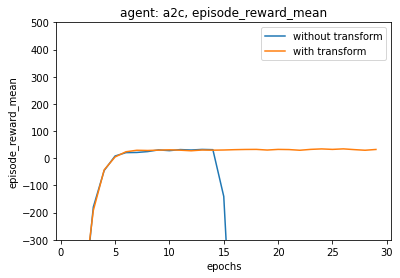

## Multi-agent
### Initialization
### Training
### Evaluation
### Visualization